# Linear Regression Health Costs Calculator

## Note

Damn, I hate this problem! I feel so stupid to keep tweaking the numbers and
model layers until I get the expected result. Even so, it doesn't always work.
This is why I don't go with Data Science although in love Math. In Math,
we're able to prove the correctness. In Data Science, we (or is it just
me) keep repeating the same method and hope for a better result. When it works,
God know why (I don't believe in God, btw).

Total time for this: **2h**.


## Problem description

Copied and modfied from [this Google Colab link](https://colab.research.google.com/github/freeCodeCamp/boilerplate-linear-regression-health-costs-calculator/blob/master/fcc_predict_health_costs_with_regression.ipynb)

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

## Solution

### Download data

In [1]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

--2021-04-01 00:16:40--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘insurance.csv’

insurance.csv           [ <=>                ]  49.09K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2021-04-01 00:16:40 (1.02 MB/s) - ‘insurance.csv’ saved [50264]



### Install tensorflow docs

In [2]:
!pip install -q git+https://github.com/tensorflow/docs

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Import libraries

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### Prepare datasets

In [54]:
dataset = pd.read_csv('insurance.csv')
len(dataset)

1338

In [55]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Since the data has some text columns, we need to convert the text values to
numeric.

In [56]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


Let's pick randomly 20% record to make our `test_dataset` first

In [57]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

Now, we select the remaining 80% to make `train_dataset`

In [58]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [59]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62


### Prepare the labels


In [60]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
1     1725.55
3    21984.47
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [61]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0


In [62]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

261     17085.27
1311     4571.41
1271     3021.81
775     10560.49
1167     4529.48
Name: expenses, dtype: float64

In [63]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
261,20,0,26.8,1,0,1
1311,33,0,26.7,0,1,2
1271,25,0,34.5,0,1,2
775,51,1,33.3,3,1,1
1167,29,0,24.6,2,1,0


### Prepare the model

In [64]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

Compile it

In [65]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 6)                 13        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 198
Trainable params: 185
Non-trainable params: 13
_________________________________________________________________


Feed it.

In [66]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

## Test

9/9 - 0s - loss: 2933.1277 - mae: 2933.1277 - mse: 29813978.0000
Testing set Mean Abs Error: 2933.13 expenses
You passed the challenge. Great job!


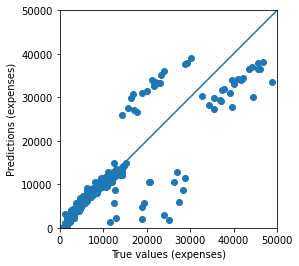

In [67]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
